Training YOLOv5 for safety detection of drivers in car and bikes.

> For cars after detection of passenger in the car we are trying to detect seatbelts and driver awareness.


1. Seatbelt On or Not
2. Yawn Detection | Drowsiness Detection
3. Helmet Detection in Bikers
4. Drink, Phone, Smoke Detection



# Datasets

1. Bike Helmet Dataset for Object Detection (bike_helmet_1)
> https://www.kaggle.com/datasets/andrewmvd/helmet-detection

2. Bike Helmet Detection (bike_helmet_2)
> roboflow

3. Seatbelt Dataset (sb_1)
> https://universe.roboflow.com/college-704lm/seatbelt_detection_dataset

4. Seatbelt Dataset (sb_2)
> https://universe.roboflow.com/seatbelttraining-7yh0f/seatbelt-detection-lb1ec

5. Drink, Phone, Smoking Detection (ac_1)
> https://universe.roboflow.com/vcx/dms2

6. Drowsiness, yawn, alertness detection (d1)
> https://universe.roboflow.com/university-mwqaq/drowsy-o8noq

## Dataset preparation

* 0 = "Drinking"
* 1 = "Helmet"
* 2 = "No_Helmet"

In [ ]:
!pip install xmltodict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import os
import xmltodict
import json
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [ ]:
!cp /content/drive/MyDrive/Data_Science/vehicle_speed_safety/ac_1.zip /content/ 
!cp /content/drive/MyDrive/Data_Science/vehicle_speed_safety/bike_helmet_1.zip /content/
!cp /content/drive/MyDrive/Data_Science/vehicle_speed_safety/d1.zip /content/
!cp /content/drive/MyDrive/Data_Science/vehicle_speed_safety/bike_helmet_2.zip /content/
!cp /content/drive/MyDrive/Data_Science/vehicle_speed_safety/sb2.zip /content/
!cp /content/drive/MyDrive/Data_Science/vehicle_speed_safety/sb_1.zip /content/

In [ ]:
!mkdir /content/data
!mkdir /content/data/images
!mkdir /content/data/labels

In [ ]:
#Temp folder for images prep
!mkdir /content/temp

In [ ]:
!unzip /content/ac_1.zip -d /content/temp

In [ ]:
!cp -R /content/temp/ac_1/images/* /content/data/images/
!cp -R /content/temp/ac_1/labels/* /content/data/labels/

In [ ]:
!rm -rf /content/temp
!mkdir /content/temp

In [ ]:
!unzip /content/bike_helmet_1.zip -d /content/temp

With Helmet
With Helmet


(-0.5, 399.5, 304.5, -0.5)

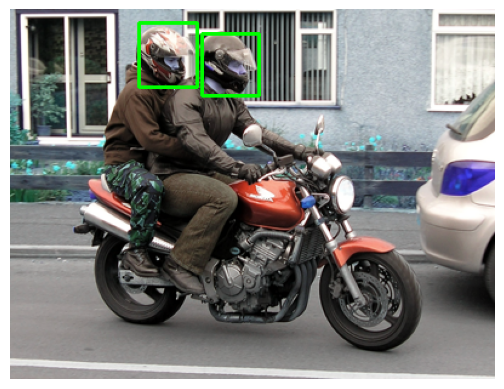

In [ ]:
with open('/content/temp/bike_helmet_1/annotations/BikesHelmets100.xml', 'r') as xml_file:
    xml_data = xml_file.read()

json_data = json.dumps(xmltodict.parse(xml_data), indent=4)
python_dict = json.loads(json_data)
img = cv2.imread("/content/temp/bike_helmet_1/images/BikesHelmets100.png")
for i in  python_dict["annotation"]["object"]:
  x1 = int(i["bndbox"]["xmin"])
  x2 = int(i["bndbox"]["xmax"])
  y1 = int(i["bndbox"]["ymin"])
  y2 = int(i["bndbox"]["ymax"])
  print(i["name"])
  cv2.rectangle(img, (x1,y1), (x2,y2), (0,255,0), 2)

plt.imshow(img)
plt.axis("off")

In [ ]:
#Function to convert rect. coords to YOLO Format

def yolo_norm(x1, x2, y1, y2, img):
  w_img=img.shape[1]
  h_img=img.shape[0]
  xmin,xmax,ymin,ymax=x1,x2,y1,y2
  w=xmax-xmin
  h=ymax-ymin
  xcenter=(xmin+w/2)/(w_img)
  ycenter=(ymin+h/2)/(h_img)
  w=w/w_img
  h=h/h_img
  return xcenter,ycenter,w,h

In [ ]:
!unzip /content/bike_helmet_2.zip -d /content/temp

In [ ]:
#In this dataset 0 = With Helmet and 1 = Without Helmet
#We'll change this to 1,2 for our dataset
#Every .txt file has to be changed 

In [ ]:
!mkdir /content/temp/bike_helmet_2/labels2

In [ ]:
folder = "/content/temp/bike_helmet_2/labels"
for i in tqdm(os.listdir(folder)):
  annot_path = os.path.join(folder, i)
  lis = []
  label_path = os.path.join("/content/temp/bike_helmet_2/labels2", i)
  x = open(annot_path)
  x = x.readlines()
  for j in x:
    temp = j.replace("\n", "")
    temp = temp.split(" ")
    xcenter,ycenter,w,h=temp[1],temp[2],temp[3],temp[4]
    if(temp[0]=="0"):
      clss = 1
    else:
      clss = 2
    string = str(clss)+" "+str(xcenter)+" "+str(ycenter)+" "+str(w)+" "+str(h)
    lis.append(string)
  with open(label_path, "a") as var:
    for z in lis:
      var.write(z)

  0%|          | 0/3735 [00:00<?, ?it/s]

In [ ]:
!cp -R /content/temp/bike_helmet_2/labels2/* /content/data/labels/
!cp -R /content/temp/bike_helmet_2/images/* /content/data/images

In [ ]:
!rm -rf /content/temp
!mkdir /content/temp

In [ ]:
!unzip /content/d1.zip -d /content/temp/

In [ ]:
#This has classes 0=awake and 1=drowsy
#For our dataset we'll change it to 3="Awake" & 4="Drowsy"

In [ ]:
!mkdir /content/temp/d1/labels2

In [ ]:
folder = "/content/temp/d1/labels"
for i in tqdm(os.listdir(folder)):
  annot_path = os.path.join(folder, i)
  lis = []
  label_path = os.path.join("/content/temp/d1/labels2", i)
  x = open(annot_path)
  x = x.readlines()
  for j in x:
    temp = j.replace("\n", "")
    temp = temp.split(" ")
    xcenter,ycenter,w,h=temp[1],temp[2],temp[3],temp[4]
    if(temp[0]=="0"):
      clss = 3
    else:
      clss = 4
    string = str(clss)+" "+str(xcenter)+" "+str(ycenter)+" "+str(w)+" "+str(h)
    lis.append(string)
  with open(label_path, "a") as var:
    for z in lis:
      var.write(z)

  0%|          | 0/100 [00:00<?, ?it/s]

In [ ]:
!cp -R /content/temp/d1/images/* /content/data/images/
!cp -R /content/temp/d1/labels2/* /content/data/labels/

In [ ]:
!rm -rf /content/temp
!mkdir /content/temp

In [ ]:
!unzip /content/sb2.zip -d /content/temp/

In [ ]:
#Here the classes are 0="No-seatbelt" and 1="Seatbelt"
#We'll change it to 5="Seatbelt" and 6="No-Seatbelt"

In [ ]:
!mkdir /content/temp/sb2/labels2

In [ ]:
folder = "/content/temp/sb2/labels"
for i in tqdm(os.listdir(folder)):
  annot_path = os.path.join(folder, i)
  lis = []
  label_path = os.path.join("/content/temp/sb2/labels2", i)
  x = open(annot_path)
  x = x.readlines()
  for j in x:
    temp = j.replace("\n", "")
    temp = temp.split(" ")
    xcenter,ycenter,w,h=temp[1],temp[2],temp[3],temp[4]
    if(temp[0]=="0"):
      clss = 6
    else:
      clss = 5
    string = str(clss)+" "+str(xcenter)+" "+str(ycenter)+" "+str(w)+" "+str(h)
    lis.append(string)
  with open(label_path, "a") as var:
    for z in lis:
      var.write(z)

  0%|          | 0/8371 [00:00<?, ?it/s]

In [ ]:
!cp -R /content/temp/sb2/labels2/* /content/data/labels
!cp -R /content/temp/sb2/images/* /content/data/images

In [ ]:
!rm -rf /content/temp
!mkdir /content/temp

In [ ]:
len(os.listdir("/content/data/images")), len(os.listdir("/content/data/labels"))

(14969, 14969)

In [ ]:
!unzip /content/sb_1.zip -d /content/temp/

In [ ]:
#Here the classes are 0="No-seatbelt" and 1="Seatbelt"
#We'll change it to 5="Seatbelt" and 6="No-Seatbelt"

In [ ]:
!mkdir /content/temp/sb_1/labels2

In [ ]:
folder = "/content/temp/sb_1/labels"
for i in tqdm(os.listdir(folder)):
  annot_path = os.path.join(folder, i)
  lis = []
  label_path = os.path.join("/content/temp/sb_1/labels2", i)
  x = open(annot_path)
  x = x.readlines()
  for j in x:
    temp = j.replace("\n", "")
    temp = temp.split(" ")
    xcenter,ycenter,w,h=temp[1],temp[2],temp[3],temp[4]
    if(temp[0]=="0"):
      clss = 6
    else:
      clss = 5
    string = str(clss)+" "+str(xcenter)+" "+str(ycenter)+" "+str(w)+" "+str(h)
    lis.append(string)
  with open(label_path, "a") as var:
    for z in lis:
      var.write(z)

In [ ]:
!cp -R /content/temp/sb_1/images/* /content/data/images/
!cp -R /content/temp/sb_1/labels2/* /content/data/labels/

In [ ]:
!rm -rf /content/temp

# Yolo Training

In [ ]:
!pip install ultralytics
!pip install wandb
!pip install clearml

In [ ]:
!clearml-init

ClearML SDK setup process

Please create new clearml credentials through the settings page in your `clearml-server` web app (e.g. http://localhost:8080//settings/workspace-configuration) 
Or create a free account at https://app.clear.ml/settings/workspace-configuration

In settings page, press "Create new credentials", then press "Copy to clipboard".

Paste copied configuration here:
api {      # Prishanga Prayus Bora's workspace     web_server: https://app.clear.ml     api_server: https://api.clear.ml     files_server: https://files.clear.ml     credentials {         "access_key" = "5AZCHFQTXSKNUHNV21V5"         "secret_key"  = "k1pGC6BWjMgqyiKzLO92VZjL1F8XED7E1jWG0cE68Q09yCrjD4"     } }
Detected credentials key="5AZCHFQTXSKNUHNV21V5" secret="k1pG***"

ClearML Hosts configuration:
Web App: https://app.clear.ml
API: https://api.clear.ml
File Store: https://files.clear.ml

Verifying credentials ...
Credentials verified!

New configuration stored in /root/clearml.conf
ClearML setup compl

In [ ]:
import torch
import random

In [ ]:
print("Number of images are ", len(os.listdir("/content/data/images")))
print("Number of YOLO Annotations are ", len(os.listdir("/content/data/labels")))

Number of images are  15896
Number of YOLO Annotations are  15896


In [ ]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 15965, done.
remote: Counting objects: 100% (134/134), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 15965 (delta 83), reused 118 (delta 75), pack-reused 15831
Receiving objects: 100% (15965/15965), 14.60 MiB | 15.74 MiB/s, done.
Resolving deltas: 100% (10952/10952), done.


In [ ]:
%cd /content/yolov5

/content/yolov5


In [ ]:
lis = os.listdir("/content/data/images")
folder = "/content/data/images"
lis = random.sample(lis, len(lis))

val_lis, train_lis = [], []
count = 0
for i in tqdm(lis):
  path = os.path.join(folder, i)
  count = count + 1
  if(count%5 == 0):
    val_lis.append(path)
  else:
    train_lis.append(path)

  0%|          | 0/15896 [00:00<?, ?it/s]

In [ ]:
print("Training images are ", len(train_lis))
print("Validation images are ", len(val_lis))

Training images are  12717
Validation images are  3179


In [ ]:
#Create train.txt and validation.txt

with open("/content/train.txt", "w") as var:
  for i in train_lis:
    var.write(i+"\n")
with open("/content/validation.txt", "w") as var:
  for i in val_lis:
    var.write(i+"\n")

In [ ]:
!python train.py --data ../data.yaml --device 0 --weights yolov5s.pt --epochs 30 \
                 --project nearbuzz --name yolov5n_2 --batch-size -1 \
                 --cache ram

## YoloV8

In [ ]:
!cp /content/drive/MyDrive/Data_Science/vehicle_speed_safety/data.zip /content/

In [ ]:
!unzip /content/data.zip -d /content/

In [ ]:
!cp -R /content/content/data /content/

In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO

In [ ]:
model = YOLO("yolov8n.pt") 

100%|██████████| 6.23M/6.23M [00:00<00:00, 24.5MB/s]


In [ ]:
model.train(data="/content/data.yaml", epochs=40,
            pretrained=True,device=0,
            project="nearbuzz", name="yolov8n_1",
            batch=-1
            )

Ultralytics YOLOv8.0.112 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/data.yaml, epochs=40, patience=50, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=nearbuzz, name=yolov8n_1, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=Fa

In [ ]:
!cp /content/data.zip /content/drive/MyDrive/Data_Science/vehicle_speed_safety/

In [ ]:
!nvidia-smi

Sun Jun  4 11:28:21 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    32W /  70W |  14463MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------